# Running and Weight Data Cleaning

* Four disparate sources
* Each have different features and formats, units, etc.
* Work through to figure out requisite steps for processing and combining
* Once done, wrap all steps up into concise functions for future usage

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np

## Load data

* Weight
  * Myfitnesspal
  * Weightgurus
* Running
  * Runkeeper
  * Strava

In [4]:
weight_gurus = pd.read_csv('data/raw/weight-gurus-history.csv')
weight_gurus.head()

,Weight (lb),Body Fat,Muscle Mass,Water,BMI,Date/Time
0,242.2,0%,0%,0%,32.8,Mar 09 2017 08:11:28 PM
1,241.8,0%,0%,0%,32.8,Mar 09 2017 08:41:09 PM
2,241.2,0%,0%,0%,32.7,Mar 09 2017 09:16:28 PM
3,236.8,28.8%,37.6%,52.5%,32.1,Mar 11 2017 08:33:01 AM
4,237.4,29.1%,37.4%,52.2%,32.2,Mar 10 2017 08:04:53 AM


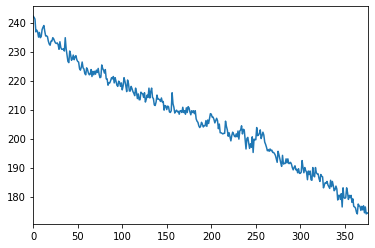

In [5]:
weight_gurus['Weight (lb)'].plot()

In [6]:
mfp = pd.read_csv('data/raw/myfitnesspal-export.csv')
mfp = mfp.dropna(subset=['Weight'])
mfp.head()

,Date,Fitbit body fat %,Fitbit steps,Fitbit tracked sleep minutes,Weight
0,2015-10-03,25.7,NaN,NaN,226.1
6,2015-10-09,28.0,3355.0,NaN,227.7
11,2015-10-14,27.5,5936.0,19.0,228.5
16,2015-10-19,27.9,1815.0,658.0,226.2
17,2015-10-20,27.5,0.0,38.0,226.3


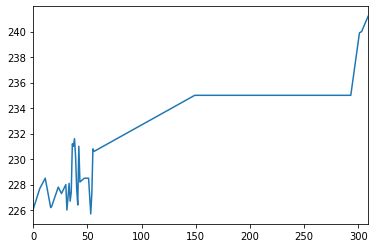

In [7]:
mfp.Weight.plot()

In [8]:
strava = pd.read_csv('data/raw/strava-activities.csv')
strava = strava[strava['Activity Type'] == "Run"]
strava.head()

,Activity ID,Activity Date,Activity Name,Activity Type,Activity Description,Elapsed Time,Distance,Relative Effort,Commute,Activity Gear,Filename
0,1934964379,"Oct 29, 2018, 11:59:33 PM","Monday night jog, 9 days after 13.1",Run,"Monday night jog, 9 days after 13.1",2425,7.18,NaN,False,NaN,activities/1934964379.gpx
1,1952341289,"Nov 8, 2018, 1:56:59 AM",Wednesday night after happy hour at Webber. St...,Run,NaN,1965,4.29,NaN,False,NaN,activities/1952341289.gpx
2,1954658661,"Nov 9, 2018, 12:08:00 PM",34° Friday morning run. Long run tomorrow.,Run,NaN,1464,4.07,NaN,False,NaN,activities/1954658661.gpx
3,1958999898,"Nov 11, 2018, 3:09:44 PM",Sunday morning 4.5mi. Paws with a Cause 10k go...,Run,NaN,2598,7.31,NaN,False,NaN,activities/1958999898.gpx
4,1972499359,"Nov 18, 2018, 5:00:44 PM",Mililani Morning Run,Run,NaN,4901,13.03,NaN,False,NaN,activities/1972499359.gpx


In [9]:
runkeeper = pd.read_csv('data/raw/runkeeper-activities.csv')
runkeeper = runkeeper[runkeeper['Type'] == "Running"]
runkeeper.head()

,Activity Id,Date,Type,Route Name,Distance (mi),Duration,Average Pace,Average Speed (mph),Calories Burned,Climb (ft),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
0,dc56d0ea-6c62-4eb3-bec2-891e5124a186,2018-10-20 07:07:27,Running,NaN,13.35,2:00:33,9:02,6.65,2057.0,721,NaN,NaN,13.1. I did it.,2018-10-20-070727.gpx
1,1a3d5c43-308b-47a0-893b-51b3310d21e8,2018-10-16 18:55:20,Running,NaN,1.84,21:05,11:27,5.24,277.0,32,NaN,NaN,4 days till race say. Last brisk jog. Resting ...,2018-10-16-185520.gpx
2,28659dc6-05f4-4a1c-8209-cdbca616e924,2018-10-15 18:18:49,Running,NaN,4.51,40:18,8:56,6.72,697.0,198,NaN,NaN,"5 days till race say. 4.5mi, Sub-9min/mi",2018-10-15-181849.gpx
3,228cf7db-dbf3-4e3a-bbf5-76df736ae6c7,2018-10-12 09:21:38,Running,NaN,3.01,34:45,11:32,5.20,484.0,504,NaN,NaN,"Morning run up Mount Royal in Montreal, QC",2018-10-12-092138.gpx
4,fc4202c2-71f9-4f01-ba8e-0f2adb06df56,2018-10-07 10:35:22,Running,NaN,3.12,29:21,9:24,6.38,470.0,139,NaN,NaN,"13.1 training, Week 25 Day 1. 5km run.",2018-10-07-103522.gpx


## Convert dates to datetime

In [10]:
from datetime import datetime
from datetime import time

In [11]:
weight_gurus_dt_format = "%b %d %Y %I:%M:%S %p"
mfp_dt_format = "%Y-%m-%d"
strava_dt_format = "%b %d, %Y, %I:%M:%S %p"
runkeeper_dt_format = "%Y-%m-%d %H:%M:%S"

In [12]:
weight_gurus = weight_gurus.rename(columns={'Date/Time': 'Date'})
weight_gurus['Date'] = weight_gurus['Date'].apply(lambda x: datetime.strptime(x, weight_gurus_dt_format))

In [13]:
mfp['Date'] = mfp['Date'].apply(lambda x: datetime.strptime(x, mfp_dt_format))

In [14]:
strava = strava.rename(columns={'Activity Date': 'Date'})
strava['Date'] = strava['Date'].apply(lambda x: datetime.strptime(x, strava_dt_format))

In [15]:
runkeeper['Date'] = runkeeper['Date'].apply(lambda x: datetime.strptime(x, runkeeper_dt_format))

## Combine weight data sources

In [16]:
weight_gurus = weight_gurus.rename(columns={'Weight (lb)': 'Weight'})

In [17]:
weight_cols = ['Date', 'Weight']
weight_df = pd.concat([
    mfp[weight_cols], 
    weight_gurus[weight_cols]
])
weight_df = weight_df.sort_values('Date')
weight_df.head()

,Date,Weight
0,2015-10-03,226.1
6,2015-10-09,227.7
11,2015-10-14,228.5
16,2015-10-19,226.2
17,2015-10-20,226.3


## Combine running data sources

* Strava has elapsed time in seconds and distance in km
  * Calculate distance in miles
  * Calculate pace and duration in decimal minutes (for tying to plot attributes)
  * Calculate pace and duration as string MM:SS (minutes per mile) for display

In [18]:
# Convert km -> mi
strava['Distance'] = strava['Distance'] * 0.621371

In [19]:
# Calculate pace (in decimal minutes)
strava['Pace_min'] = strava['Elapsed Time'] / (60*strava['Distance'])

In [20]:
# Calculate duration (in decimal minutes)
strava['Duration_min'] = strava['Elapsed Time']/60.0

In [21]:
from math import floor

def decimal_minute_to_time(dec_minutes):
    """Converts decimal minutes to MM:SS format.
    
    Parameters
    ----------
    dec_minutes : float
        Time in minutes
        
    Returns
    -------
    str
    
    """
    hour = floor(dec_minutes / 60)
    minute = int(dec_minutes % 60)
    sec = int(60 * (dec_minutes - int(dec_minutes)))
    
    time_str = ""
    if hour > 0:
        time_str = "{}:{:02}:{:02}".format(hour, minute, sec)
    else:
        time_str = "{}:{:02}".format(minute, sec)
    return time_str

def time_to_decimal_minute(time_str):
    """Converts MM:SS or HH:MM:SS string to decimal minute format.
    
    Parameters
    ----------
    time_str : str
        Time in "MM:SS" or "HH:MM:SS" format
        
    Returns
    -------
    float
    
    Raises
    ------
    ValueError
        For poorly formatted string.
    
    """
    time_list = time_str.split(":")
    minute, second = int(time_list[-2]), int(time_list[-1])
    if len(time_list) == 3:
        minute = minute + 60.0 * int(time_list[0])
    if second >= 60:
        raise ValueError("Bad time string format. More than 60s: %s", second)
    dec_minute = minute + second/60.0 
    
    return dec_minute

In [22]:
decimal_minute_to_time(125.5)

'2:05:30'

In [23]:
time_to_decimal_minute("2:05:30")

125.5

In [24]:
# Convert decimal minute to MM:SS
strava['Pace'] = strava['Pace_min'].apply(decimal_minute_to_time)
strava['Duration'] = strava['Duration_min'].apply(decimal_minute_to_time)

In [25]:
strava = strava.rename(columns={'Activity Name': 'Name',
                                'Activity Description': 'Description'})

In [26]:
strava['Tracker'] = 'Strava'

In [27]:
strava.head()

,Activity ID,Date,Name,Activity Type,Description,Elapsed Time,Distance,Relative Effort,Commute,Activity Gear,Filename,Pace_min,Duration_min,Pace,Duration,Tracker
0,1934964379,2018-10-29 23:59:33,"Monday night jog, 9 days after 13.1",Run,"Monday night jog, 9 days after 13.1",2425,4.461444,NaN,False,NaN,activities/1934964379.gpx,9.059100,40.416667,9:03,40:24,Strava
1,1952341289,2018-11-08 01:56:59,Wednesday night after happy hour at Webber. St...,Run,NaN,1965,2.665682,NaN,False,NaN,activities/1952341289.gpx,12.285788,32.750000,12:17,32:45,Strava
2,1954658661,2018-11-09 12:08:00,34° Friday morning run. Long run tomorrow.,Run,NaN,1464,2.528980,NaN,False,NaN,activities/1954658661.gpx,9.648159,24.400000,9:38,24:23,Strava
3,1958999898,2018-11-11 15:09:44,Sunday morning 4.5mi. Paws with a Cause 10k go...,Run,NaN,2598,4.542222,NaN,False,NaN,activities/1958999898.gpx,9.532779,43.300000,9:31,43:17,Strava
4,1972499359,2018-11-18 17:00:44,Mililani Morning Run,Run,NaN,4901,8.096464,NaN,False,NaN,activities/1972499359.gpx,10.088766,81.683333,10:05,1:21:41,Strava


In [28]:
runkeeper = runkeeper.rename(columns={'Distance (mi)': 'Distance',
                                      'Notes': 'Name',
                                      'Average Pace': 'Pace'})

In [29]:
runkeeper['Pace_min'] = runkeeper['Pace'].apply(time_to_decimal_minute)
runkeeper['Duration_min'] = runkeeper['Duration'].apply(time_to_decimal_minute)

In [30]:
runkeeper['Description'] = None
runkeeper['Tracker'] = "Runkeeper"

In [31]:
runkeeper.head()

,Activity Id,Date,Type,Route Name,Distance,Duration,Pace,Average Speed (mph),Calories Burned,Climb (ft),Average Heart Rate (bpm),Friend's Tagged,Name,GPX File,Pace_min,Duration_min,Description,Tracker
0,dc56d0ea-6c62-4eb3-bec2-891e5124a186,2018-10-20 07:07:27,Running,NaN,13.35,2:00:33,9:02,6.65,2057.0,721,NaN,NaN,13.1. I did it.,2018-10-20-070727.gpx,9.033333,120.550000,None,Runkeeper
1,1a3d5c43-308b-47a0-893b-51b3310d21e8,2018-10-16 18:55:20,Running,NaN,1.84,21:05,11:27,5.24,277.0,32,NaN,NaN,4 days till race say. Last brisk jog. Resting ...,2018-10-16-185520.gpx,11.450000,21.083333,None,Runkeeper
2,28659dc6-05f4-4a1c-8209-cdbca616e924,2018-10-15 18:18:49,Running,NaN,4.51,40:18,8:56,6.72,697.0,198,NaN,NaN,"5 days till race say. 4.5mi, Sub-9min/mi",2018-10-15-181849.gpx,8.933333,40.300000,None,Runkeeper
3,228cf7db-dbf3-4e3a-bbf5-76df736ae6c7,2018-10-12 09:21:38,Running,NaN,3.01,34:45,11:32,5.20,484.0,504,NaN,NaN,"Morning run up Mount Royal in Montreal, QC",2018-10-12-092138.gpx,11.533333,34.750000,None,Runkeeper
4,fc4202c2-71f9-4f01-ba8e-0f2adb06df56,2018-10-07 10:35:22,Running,NaN,3.12,29:21,9:24,6.38,470.0,139,NaN,NaN,"13.1 training, Week 25 Day 1. 5km run.",2018-10-07-103522.gpx,9.400000,29.350000,None,Runkeeper


In [32]:
run_cols = ['Date', 'Name', 'Description', 'Distance', 'Pace',
            'Duration', 'Pace_min', 'Duration_min', 'Tracker']

In [33]:
run_df = pd.concat([strava[run_cols], runkeeper[run_cols]])

In [34]:
run_df.head()

,Date,Name,Description,Distance,Pace,Duration,Pace_min,Duration_min,Tracker
0,2018-10-29 23:59:33,"Monday night jog, 9 days after 13.1","Monday night jog, 9 days after 13.1",4.461444,9:03,40:24,9.059100,40.416667,Strava
1,2018-11-08 01:56:59,Wednesday night after happy hour at Webber. St...,NaN,2.665682,12:17,32:45,12.285788,32.750000,Strava
2,2018-11-09 12:08:00,34° Friday morning run. Long run tomorrow.,NaN,2.528980,9:38,24:23,9.648159,24.400000,Strava
3,2018-11-11 15:09:44,Sunday morning 4.5mi. Paws with a Cause 10k go...,NaN,4.542222,9:31,43:17,9.532779,43.300000,Strava
4,2018-11-18 17:00:44,Mililani Morning Run,NaN,8.096464,10:05,1:21:41,10.088766,81.683333,Strava


## Encapsulate procedure into functions

Give your code a home! Put this into a file for posterity!

In [44]:
WG_DT_FORMAT = "%b %d %Y %I:%M:%S %p"
MFP_DT_FORMAT = "%Y-%m-%d"
RUNKEEPER_DT_FORMAT = "%Y-%m-%d %H:%M:%S"
STRAVA_DT_FORMAT = "%b %d, %Y, %I:%M:%S %p"

WEIGHT_COLS = ["Date", "Weight"]
RUN_COLS = ['Date', 'Name', 'Description', 'Distance', 'Pace',
            'Duration', 'Pace_min', 'Duration_min', 'Tracker']

In [45]:
def process_weight_gurus(wg_filename):
    weight_gurus = pd.read_csv(wg_filename)
    weight_gurus = weight_gurus.rename(columns={'Date/Time': 'Date'})
    weight_gurus['Date'] = weight_gurus['Date'].apply(
        lambda x: datetime.strptime(x, WG_DT_FORMAT)
    )
    weight_gurus = weight_gurus.rename(
        columns={'Weight (lb)': 'Weight'}
    )
    
    return weight_gurus

In [46]:
def process_mfp_weight(mfp_filename):
    mfp = pd.read_csv(mfp_filename)
    mfp = mfp.dropna(subset=['Weight'])
    mfp['Date'] = mfp['Date'].apply(
        lambda x: datetime.strptime(x, MFP_DT_FORMAT)
    )
    return mfp

In [47]:
def process_runkeeper(runkeeper_filename):
    runkeeper = pd.read_csv(runkeeper_filename)
    runkeeper = runkeeper[runkeeper['Type'] == "Running"]
    runkeeper['Date'] = runkeeper['Date'].apply(
        lambda x: datetime.strptime(x, RUNKEEPER_DT_FORMAT)
    )

    runkeeper = runkeeper.rename(columns={'Distance (mi)': 'Distance',
                                          'Notes': 'Name',
                                          'Average Pace': 'Pace'})

    runkeeper['Pace_min'] = runkeeper['Pace'].apply(time_to_decimal_minute)
    runkeeper['Duration_min'] = runkeeper['Duration'].apply(time_to_decimal_minute)

    runkeeper['Description'] = None
    runkeeper['Tracker'] = "Runkeeper"
    
    return runkeeper

In [48]:
def process_strava(strava_filename, dt_format=STRAVA_DT_FORMAT):
    
    # Load and filter to only running activities
    strava = pd.read_csv(strava_filename)
    strava = strava[strava['Activity Type'] == "Run"]
    
    # Rename the features for consistency
    strava = strava.rename(columns={'Activity Date': 'Date',
                                    'Activity Name': 'Name',
                                    'Activity Description': 'Description'})
    
    # Turn Date into datetime type
    strava['Date'] = strava['Date'].apply(
        lambda x: datetime.strptime(x, dt_format)
    )
    
    # Convert km -> mi
    strava['Distance'] = strava['Distance'] * 0.621371

    # Calculate pace (in decimal minutes)
    strava['Pace_min'] = strava['Elapsed Time'] / (60 * strava['Distance'])

    # Calculate duration (in decimal minutes)
    strava['Duration_min'] = strava['Elapsed Time']/60.0

    # Convert decimal minute to MM:SS
    strava['Pace'] = strava['Pace_min'].apply(decimal_minute_to_time)
    strava['Duration'] = strava['Duration_min'].apply(decimal_minute_to_time)

    # Tag each row with the tracker it came from
    strava['Tracker'] = 'Strava'
    
    return strava

In [49]:
def combine_weights(df_list, weight_cols=WEIGHT_COLS):
    weight_df = pd.concat([df[weight_cols] for df in df_list])
    weight_df = weight_df.sort_values('Date')
    return weight_df

In [50]:
def combine_runs(df_list, run_cols=RUN_COLS):
    run_df = pd.concat([df[run_cols] for df in df_list])
    run_df = run_df.sort_values('Date')
    return run_df

In [51]:
def main():
    strava = process_strava('data/raw/strava-activities.csv')
    runkeeper = process_runkeeper('data/raw/runkeeper-activities.csv')
    
    mfp = process_mfp_weight('data/raw/myfitnesspal-export.csv')
    weight_gurus = process_weight_gurus('data/raw/weight-gurus-history.csv')
    
    run_df = combine_runs([strava, runkeeper])
    weight_df = combine_weights([mfp, weight_gurus])
    
    run_df.to_csv('data/processed/run.csv')
    weight_df.to_csv('data/processed/weight.csv')

In [52]:
if __name__ == "__main__":
    print("processing data beep boop bonk")
    main()

processing data beep boop bonk
